In [82]:
import pandas as pd
import seaborn as sns

train_pile_road = r'C:\Users\leehy\OneDrive\바탕 화면\유니브\1st 머신러닝 - 타이타닉\data\train.csv'
test_pile_road = r'C:\Users\leehy\OneDrive\바탕 화면\유니브\1st 머신러닝 - 타이타닉\data\test.csv'

train = pd.read_csv(train_pile_road)
test = pd.read_csv(test_pile_road)

In [83]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# train, test 데이터 결합

# data dictionary 
* survived: 0:죽, 1:살
* pclass: ticket class 
* sibsp: 함께 동반 인원의 수  -> 형제자매
* Parch : 함꼐 탑승한 가족의 수 -> 배우자
* embarked: 선착장 정보 
* cabin: 짐 위치

In [85]:
combined = pd.concat([train, test], ignore_index=True)

In [86]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
train.shape

(891, 12)

891개의 승객정보, 12개의 칼럼

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    df = pd.DataFrame({
        'Survived': survived,
        'Dead': dead}).fillna(0)
    
    df.plot(kind='bar', stacked=True, figsize=(10,5))
    plt.title(f'Bar Chart of {feature} by Survival Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()



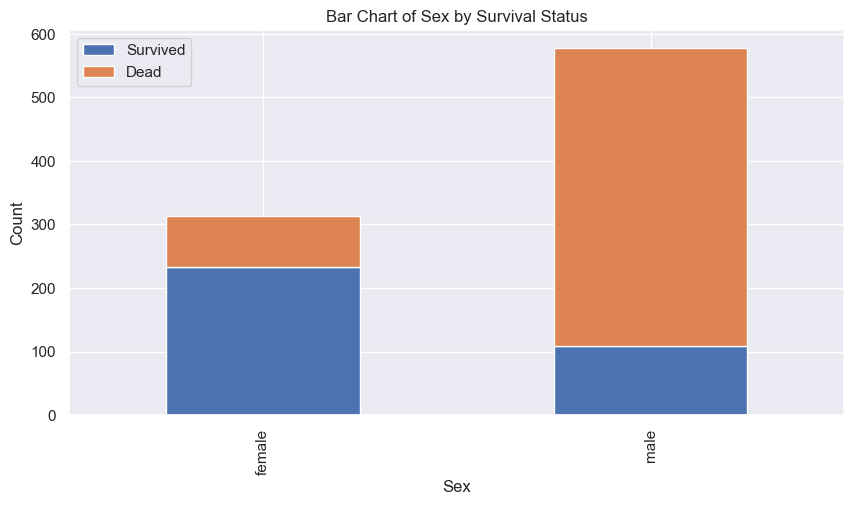

In [93]:
bar_chart('Sex')

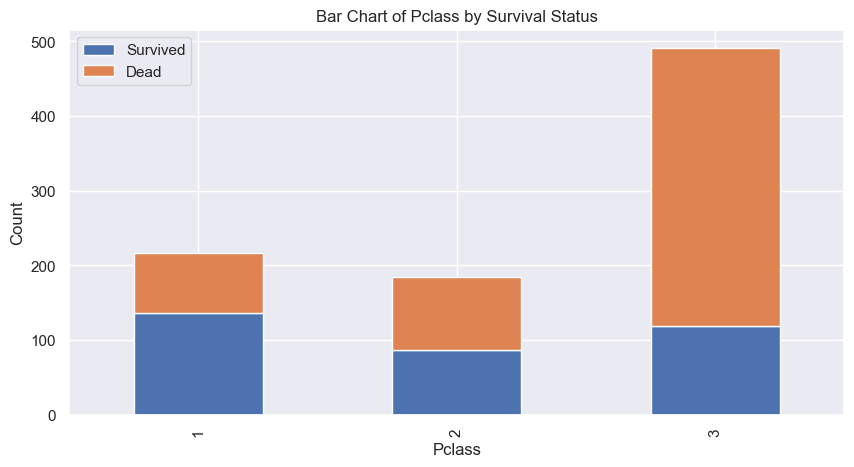

In [94]:
bar_chart('Pclass')

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

def bar_chart2(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()

    df = pd.DataFrame({
        'Survived': survived,
        'Dead': dead
    }).fillna(0) 
    
    df = df.T  
    
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f'Bar Chart of {feature} by Survival Status')
    plt.xlabel('Survival Status')
    plt.ylabel('Count')
    plt.xticks(ticks=range(len(df)), labels=['Survived', 'Dead'])
    plt.legend(title=feature)
    
    plt.show()


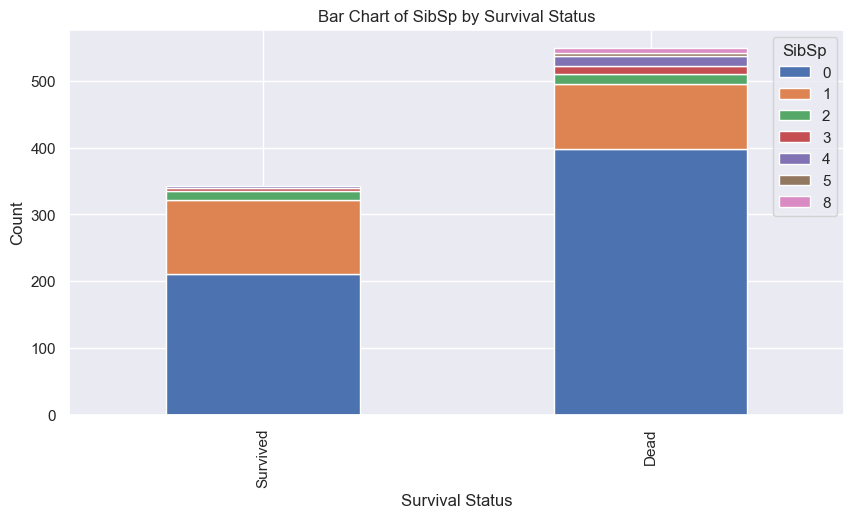

In [96]:
bar_chart2('SibSp')

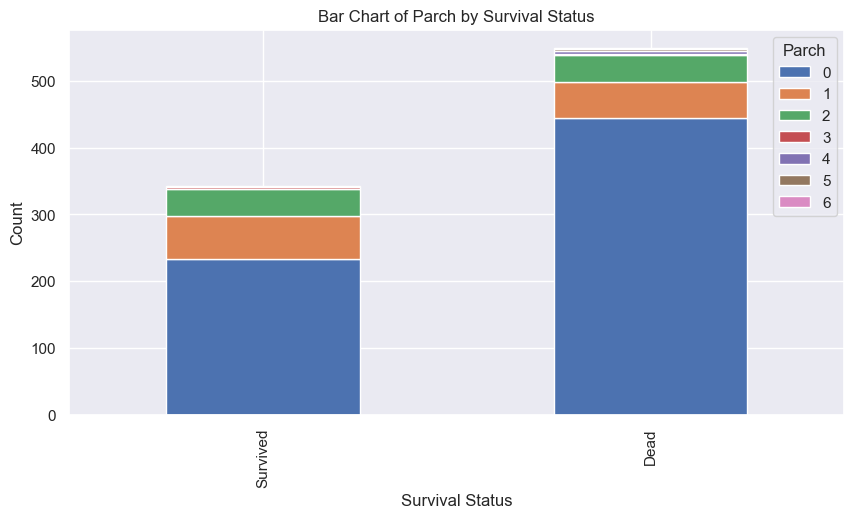

In [97]:
bar_chart2('Parch')

* 가설1: 여성이 남성보다 생존률이 높음
* 가설2: 1등급 좌석이 생존률이 높고, 3등급 좌석이 생존률이 낮
* 가설3: 혼자 탑승한 경 생존자 수가 적음.
* 가설4: 가족과 함꼐 탑승한 사람이 생존자 수가 더 많음

# *데이터 전처리*


## 1.name

In [100]:
combined = pd.concat([train, test], axis=0, ignore_index=True)
combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [102]:
combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [104]:
combined['Title'] = combined['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
combined['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [ ]:
combined

In [109]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":4, "Rev":4, "Mlle":1, "Major":4, "Col":4, "Countess":4, "Capt":4, "Ms":1, "Sir":4, "Lady":2, "Dona":2, "Jonkheer":4, "Mme":2, "Don":0}

for dataset in combined:
    dataset['Title'] = dataset['Title'].map(title_mapping)

TypeError: string indices must be integers, not 'str'

## 수정 - title 세분화

In [ ]:
train.head()

In [ ]:
bar_chart2('Title')

## 2.성별

In [ ]:
sex_mapping= {"male":0, "female":1}
for dataset in combined:
    dataset['Sex_m']= dataset['Sex'].map(sex_mapping)

In [ ]:
train.tail()

In [ ]:
bar_chart2('Sex_m')

## 3.나이

나이 결측값 채우기. 이름의 title 활용, 대푯값으로 중앙 입력

In [ ]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [ ]:
train['Age'] = train.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

In [ ]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)


0~20살 생존 빈도 그래프, 생존자가 더 많음

In [ ]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

20~30살 생존 빈도 그래프. 나이가 많아질수록 사망자가 많아짐

In [ ]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

30~40살 생존 빈도 그래프. 나이가 적을수록 생존자가 더 적음

**binning**

나이 매핑
* 0~19세 : 0
* 20~34세: 1 
* 35~65세: 2
* 65세 이상: 3

In [ ]:
for dataset in combined:
    dataset.loc[dataset['Age'] <= 9, 'Age_m']=0
    dataset.loc[(dataset['Age'] > 9) & (dataset['Age'] <= 19), 'Age_m']=1
    dataset.loc[(dataset['Age'] > 19) & (dataset['Age'] <= 29), 'Age_m']=2
    dataset.loc[(dataset['Age'] > 29) & (dataset['Age'] <= 39), 'Age_m']=3
    dataset.loc[(dataset['Age'] > 39) & (dataset['Age'] <= 49), 'Age_m']=4
    dataset.loc[(dataset['Age'] > 49) & (dataset['Age'] <= 59), 'Age_m']=5
    dataset.loc[dataset['Age'] > 59, 'Age_m']=6



In [ ]:
train.head(20)

In [ ]:
age_m_survived_counts = train.groupby(['Age_m', 'Survived']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))

sns.lineplot(data=age_m_survived_counts[age_m_survived_counts['Survived'] == 1], 
             x='Age_m', y='Count', marker='o', linestyle='-', label='Survived')

sns.lineplot(data=age_m_survived_counts[age_m_survived_counts['Survived'] == 0], 
             x='Age_m', y='Count', marker='o', linestyle='-', label='Dead')

plt.title('Survival Count by Age Categories')
plt.xlabel('Age_m Category')
plt.ylabel('Number of People')
plt.xticks(ticks=range(7), labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+'])
plt.legend(title='Survival')
plt.grid(True)
plt.show()


그래프 수정

* 10대 미만: 생존 > 사망
* 10대: 생존 < 사망
* 20대: 생존 < 사망
* 30대: 생존 < 사망
* 40대: 생존 < 사망
* 50대: 생존 < 사망
* 60대 이상: 생존 < 사망

## 4. embarked

탑승 지역, 좌석 등급 교차분석



In [ ]:
pc1 = train[train['Pclass']==1]['Embarked'].value_counts()
pc2 = train[train['Pclass']==2]['Embarked'].value_counts()
pc3 = train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([pc1, pc2, pc3])
df.index=['1st class', '2st class', '3st class']
df.plot(kind='bar', stacked=True)

In [ ]:
print(type(train))

In [ ]:
train_embarked_ratio = train.groupby('Pclass')['Embarked'].value_counts(normalize=True).unstack()
test_embarked_ratio = test.groupby('Pclass')['Embarked'].value_counts(normalize=True).unstack()

print(train_embarked_ratio)

In [ ]:
print(test_embarked_ratio)

In [ ]:
import numpy as np

def fill_embarked(row, embarked_ratio):
    if pd.isnull(row['Embarked']):
        pclass = row['Pclass']
        return np.random.choice(['C', 'Q', 'S'], p=embarked_ratio.loc[pclass].values)
    else:
        return row['Embarked']

train['Embarked'] = train.apply(lambda row: fill_embarked(row, train_embarked_ratio), axis=1)
test['Embarked'] = test.apply(lambda row: fill_embarked(row, test_embarked_ratio), axis=1)



* Q : 낮은 등급일수록 많음.
* S : 모든 등급에서 사람이 많음

In [ ]:
embarked_mapping={"S":0,"C":1, "Q":2}
for dataset in combined:
    dataset['Embarked_m'] = dataset['Embarked'].map(embarked_mapping)

In [ ]:
corr_value = train[['Pclass', 'Embarked_m']].corr()


sns.heatmap(corr_value, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 15})
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
train.head()

In [ ]:
train.isnull().sum()

## 5.Fare (티켓 가격)

좌석 등급별 중앙값으로 결측값 넣음

In [ ]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [ ]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()


In [ ]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

In [ ]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

In [ ]:
for dataset in combined:
    dataset.loc[dataset['Fare']<=17, 'Fare_m']=0
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare'] <= 30), 'Fare_m']=1
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare'] <= 100), 'Fare_m']=2
    dataset.loc[dataset['Fare']>100, 'Fare_m']=3
    

In [ ]:
train.head()

##  6. cabin 

In [ ]:
train.Cabin.value_counts()

In [ ]:
for dataset in combined:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

pc1 = train[train['Pclass']==1]['Cabin'].value_counts()
pc2 = train[train['Pclass']==2]['Cabin'].value_counts()    
pc3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([pc1, pc2, pc3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [ ]:
cabin_mapping = {"A": 0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8} #피쳐 스케일링
for dataset in combined:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)


In [ ]:
train.isnull().sum()

## 7.family size

In [106]:
train["FamilySize"] = train["SibSp"] + train["Parch"] +1
test["FamilySize"] = test["SibSp"] + test["Parch"] +1

C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\leehy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 11.0)

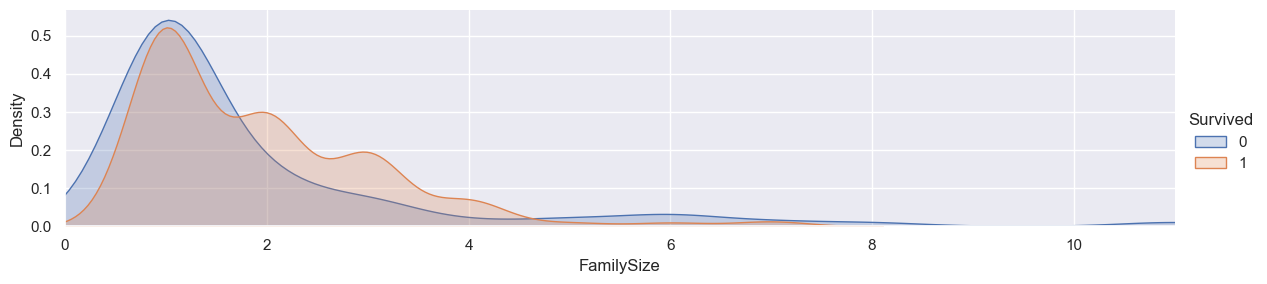

In [107]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

가족이 함께 탑승하지 않았을 경우 사망자 수가 더많지만, 가족이 있을수록 생존자가 더 많음


매핑
* 1명(본인 혼자) : 0
* 2명(본인+가족 1명) :0.4
* 3명: 0.8 
* ...
* 10명: 3.6
* 11명: 4

피쳐의 스케일링으로, 본래보다 작은 단위의 숫자 할당.


In [108]:
family_mapping={1:0, 2:0.4, 3:0.8, 4:1.2,5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in combined:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

train.head()

TypeError: string indices must be integers, not 'str'

In [ ]:
test.head()

In [ ]:
dropdata = ['SibSp','Parch','Sex','Embarked', 'Ticket', 'Name']
train_data = train.drop(dropdata, axis=1)
test_data = test.drop(dropdata, axis=1)

In [ ]:
train.head(10)

In [ ]:
#train_data = pd.get_dummies(train_data, columns=['Title'], prefix='Title')
#test_data = pd.get_dummies(test_data, columns=['Title'], prefix='Title')

In [ ]:
test_data.head()

In [ ]:
numeric_data = train_data.select_dtypes(include=[np.number])  
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [ ]:
combined.insull().

In [ ]:
pd.concat([train, test], axis=0, ignore_index=True).isnull().sum()